## 準備

In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
import japanize_matplotlib
import scipy.stats as stats

import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

In [3]:
nikkei = pd.read_csv('../stock_data/nk400.csv', index_col='Date')[['Nikkei225']]
nk400 = pd.read_csv('../stock_data/nk400.csv', index_col='Date')[['Index']]
nk200 = pd.read_csv('../stock_data/nk200.csv', index_col='Date')[['Index']]

nikkei.index = pd.to_datetime(nikkei.index)
nk400.index = pd.to_datetime(nk400.index)
nk200.index = pd.to_datetime(nk200.index)

## 記述統計

In [4]:
# 検証期間 JPX日経中小型株指数連動ETF上場 ~ 2022/7/29まで 1300営業日
variables = pd.concat([nikkei.describe().T, nk400.describe().T, nk200.describe().T])
variables.index = ['Nikkei 225', 'JPX-Nikkei 400', 'JPX-Nikkei Mid Small']
variables = variables[['count', 'mean', 'std', 'min', 'max']]
variables

,count,mean,std,min,max
Nikkei 225,1300.0,23751.428463,3262.929742,16552.830078,30670.099609
JPX-Nikkei 400,1300.0,15881.265385,1610.508109,11760.000000,19620.000000
JPX-Nikkei Mid Small,1300.0,14526.590769,1444.571965,9630.000000,17930.000000


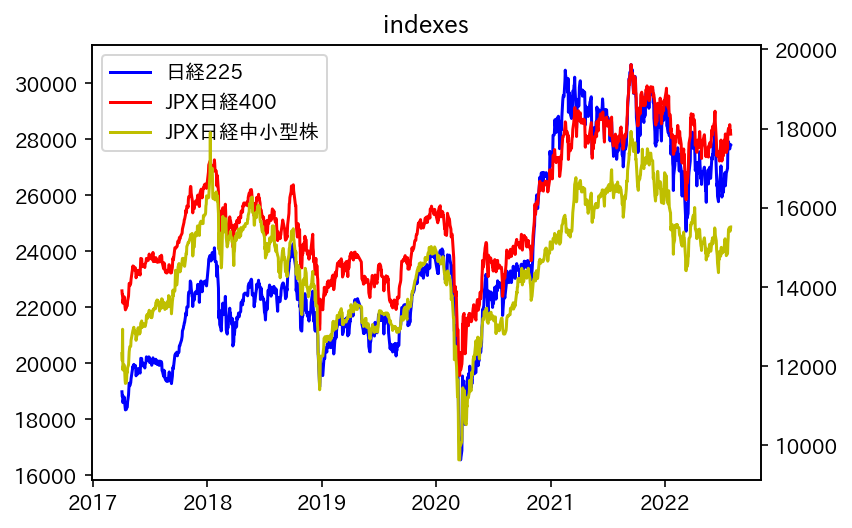

In [5]:
fig = plt.figure()
ax1 = fig.subplots()
ax2 = ax1.twinx()

ax1.plot(nikkei, color='b', label='日経225')
ax2.plot(nk400, color='r', label='JPX日経400')
ax2.plot(nk200, color='y', label='JPX日経中小型株') 

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1 + h2, l1 + l2)
plt.title('indexes')
plt.show()

In [6]:
def load_data(params):
    timeperiod, nbdevup, nbdevdn, matype = params
    
    # 取得したデータの読み込み
    data_list = []
    csv_name_list = ['nk400_d_upper', 'nk400_d_lower', 'nk400_w_upper', 'nk400_w_lower',
                     'nk200_d_upper', 'nk200_d_lower', 'nk200_w_upper', 'nk200_w_lower']
    for name in csv_name_list:
        data = pd.read_csv('../output/{}_{}_{}_{}/{}.csv'.format(timeperiod, nbdevup, nbdevdn, matype, name), encoding='shift-jis', index_col=0)
        data_list.append(data)
    [nk400_d_upper, nk400_d_lower, nk400_w_upper, nk400_w_lower, nk200_d_upper, nk200_d_lower, nk200_w_upper, nk200_w_lower] = data_list
    
    values = np.array([[len(nk400_d_upper), len(nk400_w_upper), len(nk400_d_lower), len(nk400_w_lower)],
                       [len(nk200_d_upper), len(nk200_w_upper), len(nk200_d_lower), len(nk200_w_lower)],]).T

    numbers = pd.DataFrame(data=values,)
    return numbers, data_list

In [7]:
[numbers_20_1_1_0,
 [nk400_d_upper_20_1_1_0, nk400_d_lower_20_1_1_0, nk400_w_upper_20_1_1_0, nk400_w_lower_20_1_1_0, 
  nk200_d_upper_20_1_1_0, nk200_d_lower_20_1_1_0, nk200_w_upper_20_1_1_0, nk200_w_lower_20_1_1_0]] = load_data([20, 1, 1, 0])

[numbers_20_2_2_0,
 [nk400_d_upper_20_2_2_0, nk400_d_lower_20_2_2_0, nk400_w_upper_20_2_2_0, nk400_w_lower_20_2_2_0,
  nk200_d_upper_20_2_2_0, nk200_d_lower_20_2_2_0, nk200_w_upper_20_2_2_0, nk200_w_lower_20_2_2_0]] = load_data([20, 2, 2, 0])

[numbers_20_2_2_1,
 [nk400_d_upper_20_2_2_1, nk400_d_lower_20_2_2_1, nk400_w_upper_20_2_2_1, nk400_w_lower_20_2_2_1,
  nk200_d_upper_20_2_2_1, nk200_d_lower_20_2_2_1, nk200_w_upper_20_2_2_1, nk200_w_lower_20_2_2_1]] = load_data([20, 2, 2, 1])

[numbers_20_3_3_0,
 [nk400_d_upper_20_3_3_0, nk400_d_lower_20_3_3_0, nk400_w_upper_20_3_3_0, nk400_w_lower_20_3_3_0,
  nk200_d_upper_20_3_3_0, nk200_d_lower_20_3_3_0, nk200_w_upper_20_3_3_0, nk200_w_lower_20_3_3_0]] = load_data([20, 3, 3, 0])

In [8]:
numbers_20_1_1_0

,0,1
0,156061,73078
1,32350,14817
2,120213,60996
3,22313,11242


In [9]:
numbers_20_2_2_0

,0,1
0,35938,17708
1,7429,3974
2,27452,13186
3,4619,2164


In [10]:
numbers_20_2_2_1

,0,1
0,24601,11992
1,4747,2636
2,16347,8389
3,3111,1458


In [11]:
numbers_20_3_3_0

,0,1
0,2565,1734
1,356,340
2,1949,1090
3,509,187


## イベントスタディの結果をまとめる

In [12]:
# データを渡すと平均値算出, 有意性検定を行い, DataFrameを返す関数
def get_mean_and_test(data):
    df = pd.DataFrame(index=[1,2,3,4,5], columns=['ARs', 'p', 'p-test', 'CARs', 't', 't-test'])

    df['ARs'] = list(data[['ar1', 'ar2', 'ar3', 'ar4', 'ar5']].mean())
    df['CARs'] = list(data[['car1', 'car2', 'car3', 'car4', 'car5']].mean())

    p_list = []
    p_test = []
    t_list = []
    t_test = []

    # AR p-test
    for ar in ['ar1', 'ar2', 'ar3', 'ar4', 'ar5']:
        t, p = stats.ttest_1samp(data.dropna()[ar], popmean=0)
        p_list.append(p)

        if p < 0.001:
            p_test.append('***')
        elif p < 0.01:
            p_test.append('**')
        elif p < 0.05:
            p_test.append('*')
        elif p > 0.05:
            p_test.append('')

    # CAR t-test 
    for car in ['car1', 'car2', 'car3', 'car4', 'car5']:
        t, p = stats.ttest_1samp(data.dropna()[car], popmean=0)
        t_list.append(t)

        if abs(t) > stats.norm.interval(alpha=0.999, loc=0, scale=1)[1]:
            t_test.append('***')
        elif abs(t) > stats.norm.interval(alpha=0.99, loc=0, scale=1)[1]:
            t_test.append('**')
        elif abs(t) > stats.norm.interval(alpha=0.95, loc=0, scale=1)[1]:
            t_test.append('*')
        elif abs(t) < stats.norm.interval(alpha=0.95, loc=0, scale=1)[1]:
            t_test.append('')

    df['p'] = p_list
    df['p-test'] = p_test
    df['t'] = t_list
    df['t-test'] = t_test
    
    return df

In [13]:
def TablePlot(data, file_name):
    print(file_name)
    df = get_mean_and_test(data)
    fig, ax = plt.subplots(figsize=(4,2))
    ax.axis('off')
    ax.table(cellText=df.values,
             colLabels=df.columns,
             loc='center',
             bbox=[0,0,1,1])
    plt.title('../table/{}.png'.format(file_name))
    plt.show()

In [14]:
data_list = [nk400_d_upper_20_1_1_0, nk400_d_lower_20_1_1_0, nk400_w_upper_20_1_1_0, nk400_w_lower_20_1_1_0, 
             nk200_d_upper_20_1_1_0, nk200_d_lower_20_1_1_0, nk200_w_upper_20_1_1_0, nk200_w_lower_20_1_1_0,
             nk400_d_upper_20_2_2_0, nk400_d_lower_20_2_2_0, nk400_w_upper_20_2_2_0, nk400_w_lower_20_2_2_0,
             nk200_d_upper_20_2_2_0, nk200_d_lower_20_2_2_0, nk200_w_upper_20_2_2_0, nk200_w_lower_20_2_2_0,
             nk400_d_upper_20_2_2_1, nk400_d_lower_20_2_2_1, nk400_w_upper_20_2_2_1, nk400_w_lower_20_2_2_1,
             nk200_d_upper_20_2_2_1, nk200_d_lower_20_2_2_1, nk200_w_upper_20_2_2_1, nk200_w_lower_20_2_2_1,
             nk400_d_upper_20_3_3_0, nk400_d_lower_20_3_3_0, nk400_w_upper_20_3_3_0, nk400_w_lower_20_3_3_0,
             nk200_d_upper_20_3_3_0, nk200_d_lower_20_3_3_0, nk200_w_upper_20_3_3_0, nk200_w_lower_20_3_3_0]

file_name_list = ['nk400_d_upper_20_1_1_0', 'nk400_d_lower_20_1_1_0', 'nk400_w_upper_20_1_1_0', 'nk400_w_lower_20_1_1_0',
                  'nk200_d_upper_20_1_1_0', 'nk200_d_lower_20_1_1_0', 'nk200_w_upper_20_1_1_0', 'nk200_w_lower_20_1_1_0',
                  'nk400_d_upper_20_2_2_0', 'nk400_d_lower_20_2_2_0', 'nk400_w_upper_20_2_2_0', 'nk400_w_lower_20_2_2_0',
                  'nk200_d_upper_20_2_2_0', 'nk200_d_lower_20_2_2_0', 'nk200_w_upper_20_2_2_0', 'nk200_w_lower_20_2_2_0',
                  'nk400_d_upper_20_2_2_1', 'nk400_d_lower_20_2_2_1', 'nk400_w_upper_20_2_2_1', 'nk400_w_lower_20_2_2_1',
                  'nk200_d_upper_20_2_2_1', 'nk200_d_lower_20_2_2_1', 'nk200_w_upper_20_2_2_1', 'nk200_w_lower_20_2_2_1',
                  'nk400_d_upper_20_3_3_0', 'nk400_d_lower_20_3_3_0', 'nk400_w_upper_20_3_3_0', 'nk400_w_lower_20_3_3_0',
                  'nk200_d_upper_20_3_3_0', 'nk200_d_lower_20_3_3_0', 'nk200_w_upper_20_3_3_0', 'nk200_w_lower_20_3_3_0']

In [15]:
for data, file_name in zip(data_list, file_name_list):
    print(file_name)
    display(get_mean_and_test(data))

nk400_d_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000670,4.219900e-30,***,-0.000670,-11.402009,***
2,-0.000559,7.029629e-22,***,-0.001230,-13.300674,***
3,-0.000467,5.075184e-16,***,-0.001697,-13.814400,***
4,-0.000424,2.018814e-13,***,-0.002121,-13.891501,***
5,-0.000508,9.784789e-19,***,-0.002629,-14.467327,***


nk400_d_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,0.000325,0.007828,**,0.000325,2.659432,**
2,0.000302,0.013588,*,0.000627,3.573469,***
3,0.000224,0.066611,,0.000852,3.917056,***
4,0.000229,0.061299,,0.001081,4.259326,***
5,0.000225,0.064882,,0.001307,4.563106,***


nk400_w_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.001077,0.001807,**,-0.001077,-3.120787,**
2,-0.000352,0.309946,,-0.001428,-2.911218,**
3,-0.000465,0.177094,,-0.001894,-3.160749,**
4,-0.001388,0.000051,***,-0.003281,-4.717068,***
5,-0.001270,0.000201,***,-0.004552,-5.877562,***


nk400_w_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000676,0.141649,,-0.000676,-1.469814,
2,-0.001961,0.000025,***,-0.002637,-3.751470,***
3,-0.001220,0.008630,**,-0.003857,-4.138330,***
4,-0.000182,0.694875,,-0.004039,-3.510530,***
5,-0.000495,0.283158,,-0.004534,-3.322520,***


nk200_d_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000759,9.763055e-12,***,-0.000759,-6.811247,***
2,-0.000534,9.659609e-07,***,-0.001292,-8.342835,***
3,-0.000380,4.623128e-04,***,-0.001673,-8.927561,***
4,-0.000213,4.884530e-02,*,-0.001886,-8.748170,***
5,-0.000421,9.967312e-05,***,-0.002307,-9.578181,***


nk200_d_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,0.000787,2.539031e-12,***,0.000787,7.002685,***
2,0.000439,1.084093e-04,***,0.001226,7.766887,***
3,0.000183,1.007322e-01,,0.001409,7.417752,***
4,0.000169,1.329335e-01,,0.001578,7.268498,***
5,0.000201,7.613318e-02,,0.001779,7.330657,***


nk200_w_upper_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.001226,0.103312,,-0.001226,-1.629237,
2,-0.000525,0.473397,,-0.001751,-1.677954,
3,-0.000877,0.220290,,-0.002628,-2.084275,*
4,-0.001739,0.012847,*,-0.004367,-3.032386,**
5,-0.002294,0.000963,***,-0.006661,-4.142237,***


nk200_w_lower_20_1_1_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000551,0.440843,,-0.000551,-0.770843,
2,-0.000094,0.895456,,-0.000645,-0.635348,
3,-0.000007,0.991778,,-0.000653,-0.524574,
4,-0.000090,0.898361,,-0.000743,-0.518680,
5,-0.000357,0.605156,,-0.001100,-0.688142,


nk400_d_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000815,3.962438e-10,***,-0.000815,-6.257602,***
2,-0.000652,1.196733e-07,***,-0.001467,-7.624311,***
3,-0.000378,1.842209e-03,**,-0.001845,-7.423491,***
4,-0.000352,2.857120e-03,**,-0.002197,-7.319081,***
5,-0.000446,1.390330e-04,***,-0.002643,-7.497695,***


nk400_d_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.000428,0.366012,,0.000428,0.903985,
2,0.000210,0.655882,,0.000638,0.947717,
3,0.000195,0.680503,,0.000833,1.002417,
4,0.000371,0.434895,,0.001204,1.243650,
5,0.000954,0.042721,*,0.002157,1.989875,*


nk400_w_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.001723,0.021640,*,-0.001723,-2.297693,*
2,-0.000590,0.431005,,-0.002313,-2.193131,*
3,0.000075,0.917631,,-0.002238,-1.753445,
4,-0.001681,0.018150,*,-0.003919,-2.679838,**
5,-0.000889,0.211991,,-0.004808,-2.966080,**


nk400_w_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.000467,0.698460,,0.000467,0.387483,
2,-0.004029,0.000611,***,-0.003562,-1.964154,*
3,-0.000227,0.847073,,-0.003789,-1.614785,
4,-0.001121,0.328118,,-0.004910,-1.758695,
5,-0.000512,0.644866,,-0.005422,-1.648699,


nk200_d_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000637,0.013699,*,-0.000637,-2.465366,*
2,-0.000451,0.063316,,-0.001088,-3.101542,**
3,0.000284,0.232387,,-0.000804,-1.918894,
4,0.000039,0.869941,,-0.000765,-1.599412,
5,-0.000331,0.147493,,-0.001097,-2.069234,*


nk200_d_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.002039,3.483860e-13,***,0.002039,7.282301,***
2,0.001195,1.097089e-05,***,0.003234,8.366783,***
3,0.000618,1.627813e-02,*,0.003852,8.455826,***
4,0.000340,1.928579e-01,,0.004192,8.060899,***
5,0.000333,1.852455e-01,,0.004525,7.930115,***


nk200_w_upper_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,-0.001003,0.539227,,-0.001003,-0.614110,
2,-0.002681,0.066933,,-0.003685,-1.759956,
3,-0.000919,0.521644,,-0.004603,-1.836598,
4,-0.002374,0.087714,,-0.006977,-2.486235,*
5,-0.002506,0.067591,,-0.009483,-3.056483,**


nk200_w_lower_20_2_2_0


,ARs,p,p-test,CARs,t,t-test
1,0.000914,0.633699,,0.000914,0.476763,
2,-0.001247,0.452556,,-0.000333,-0.130546,
3,-0.001666,0.367063,,-0.001998,-0.624003,
4,-0.001913,0.233117,,-0.003911,-1.076377,
5,-0.001666,0.299429,,-0.005577,-1.401344,


nk400_d_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.001155,0.059286,,-0.001155,-1.886172,
2,-0.000976,0.109352,,-0.002132,-2.408455,*
3,-0.000409,0.500813,,-0.002540,-2.299480,*
4,-0.000596,0.325929,,-0.003137,-2.413137,*
5,-0.000695,0.252385,,-0.003832,-2.583686,**


nk400_d_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.000330,0.095398,,0.000330,1.667686,
2,0.000214,0.228032,,0.000545,1.891521,
3,-0.000060,0.739970,,0.000484,1.291415,
4,0.000328,0.077843,,0.000812,1.749021,
5,0.000467,0.006701,**,0.001280,2.387845,*


nk400_w_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.001692,0.073419,,-0.001692,-1.791058,
2,-0.001774,0.048565,*,-0.003466,-2.684328,**
3,-0.000050,0.955372,,-0.003516,-2.282969,*
4,-0.001152,0.195345,,-0.004668,-2.601367,**
5,-0.001372,0.106815,,-0.006040,-3.019977,**


nk400_w_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.000344,0.824048,,0.000344,0.222408,
2,-0.003147,0.031266,*,-0.002803,-1.192986,
3,0.000501,0.732847,,-0.002302,-0.739442,
4,0.000305,0.834989,,-0.001997,-0.531998,
5,0.000451,0.752041,,-0.001546,-0.346768,


nk200_d_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.000158,0.639303,,-0.000158,-0.468688,
2,-0.000371,0.230508,,-0.000530,-1.165564,
3,0.000109,0.716356,,-0.000421,-0.777227,
4,-0.000227,0.442215,,-0.000648,-1.060138,
5,-0.000347,0.232902,,-0.000994,-1.467714,


nk200_d_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.002642,6.397854e-13,***,0.002642,7.204008,***
2,0.001769,5.377831e-07,***,0.004411,8.674173,***
3,0.001006,1.667528e-03,**,0.005417,9.261735,***
4,0.000384,2.306777e-01,,0.005801,8.834484,***
5,0.000468,1.303566e-01,,0.006269,8.782663,***


nk200_w_upper_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,-0.000391,0.840006,,-0.000391,-0.201933,
2,-0.002315,0.213557,,-0.002707,-1.055943,
3,-0.001646,0.353277,,-0.004352,-1.440542,
4,-0.003467,0.048480,*,-0.007819,-2.268519,*
5,-0.003897,0.020550,*,-0.011716,-3.119852,**


nk200_w_lower_20_2_2_1


,ARs,p,p-test,CARs,t,t-test
1,0.006354,0.026560,*,0.006354,2.226530,*
2,0.003187,0.204277,,0.009541,2.476104,*
3,0.001277,0.573773,,0.010819,2.349501,*
4,0.000219,0.917843,,0.011038,2.169578,*
5,-0.000040,0.984754,,0.010998,2.038417,*


nk400_d_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.000568,0.363909,,0.000568,0.908144,
2,-0.000984,0.050795,,-0.000417,-0.531363,
3,-0.000604,0.201548,,-0.001020,-1.126502,
4,0.000263,0.581630,,-0.000758,-0.748083,
5,-0.000052,0.908136,,-0.000810,-0.730004,


nk400_d_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.005074,0.425872,,0.005074,0.796453,
2,0.006214,0.328635,,0.011288,1.253463,
3,0.005313,0.404617,,0.016601,1.503278,
4,0.005363,0.399692,,0.021964,1.722083,
5,0.005376,0.398076,,0.027339,1.916390,


nk400_w_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000956,0.776014,,-0.000956,-0.285005,
2,-0.004807,0.133706,,-0.005763,-1.240922,
3,0.003225,0.393764,,-0.002538,-0.411176,
4,-0.006263,0.040506,*,-0.008801,-1.256533,
5,0.000255,0.944622,,-0.008546,-1.056551,


nk400_w_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.013622,0.101644,,0.013622,1.675468,
2,-0.004921,0.356586,,0.008701,0.833597,
3,0.004814,0.392000,,0.013516,1.250025,
4,0.007607,0.107461,,0.021123,1.718083,
5,-0.000895,0.923536,,0.020228,1.173184,


nk200_d_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.001756,0.121338,,0.001756,1.550114,
2,0.000511,0.599176,,0.002268,1.519744,
3,0.000154,0.863798,,0.002422,1.405127,
4,0.000587,0.506998,,0.003008,1.546851,
5,-0.001531,0.064473,,0.001477,0.684152,


nk200_d_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.002389,0.050007,,0.002389,1.962626,*
2,0.002512,0.121309,,0.004901,2.490544,*
3,0.000200,0.826373,,0.005100,2.278283,*
4,-0.000279,0.776420,,0.004821,2.025006,*
5,-0.000487,0.588345,,0.004334,1.697759,


nk200_w_upper_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,0.003961,0.520584,,0.003961,0.643942,
2,-0.004211,0.472144,,-0.000250,-0.033329,
3,-0.003722,0.463850,,-0.003971,-0.459444,
4,-0.002334,0.619915,,-0.006305,-0.646502,
5,0.001399,0.763849,,-0.004907,-0.466753,


nk200_w_lower_20_3_3_0


,ARs,p,p-test,CARs,t,t-test
1,-0.000391,0.975724,,-0.000391,-0.031287,
2,0.032293,0.019032,*,0.031902,1.875781,
3,0.009959,0.409259,,0.041862,2.793788,**
4,0.000410,0.974668,,0.042272,1.799556,
5,-0.011612,0.275690,,0.030660,1.247597,


## 異常リターンのプロット（パラメータ別で比較）

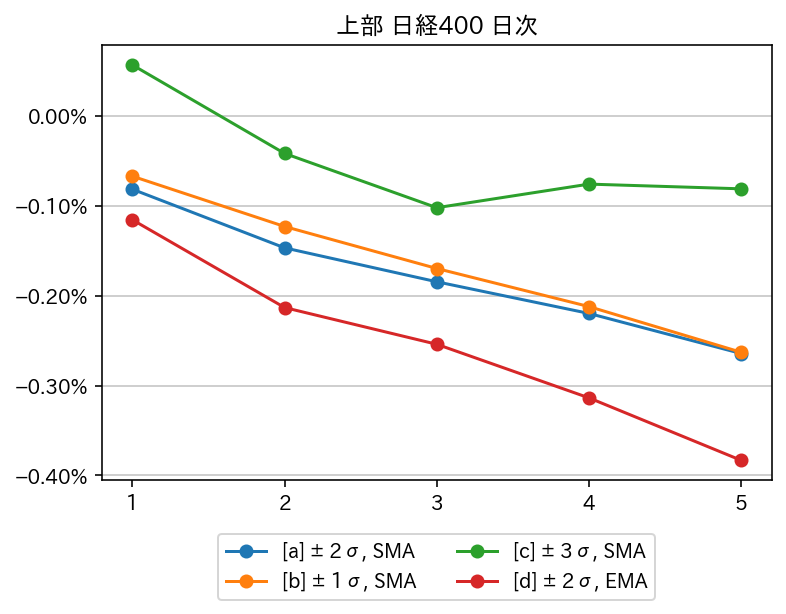

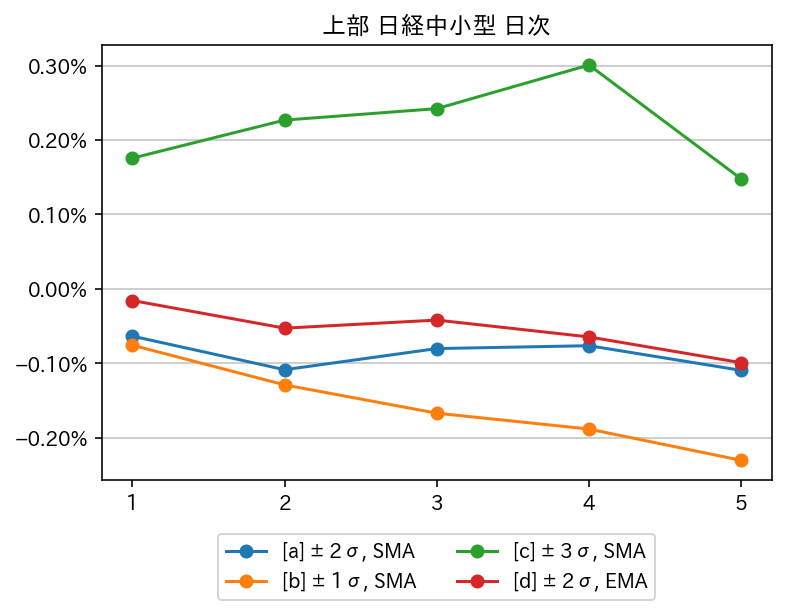

In [16]:
y1 = get_mean_and_test(nk400_d_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_d_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_d_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_d_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('上部 日経400 日次')
plt.show()

y1 = get_mean_and_test(nk200_d_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_d_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_d_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_d_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('上部 日経中小型 日次')
plt.show()

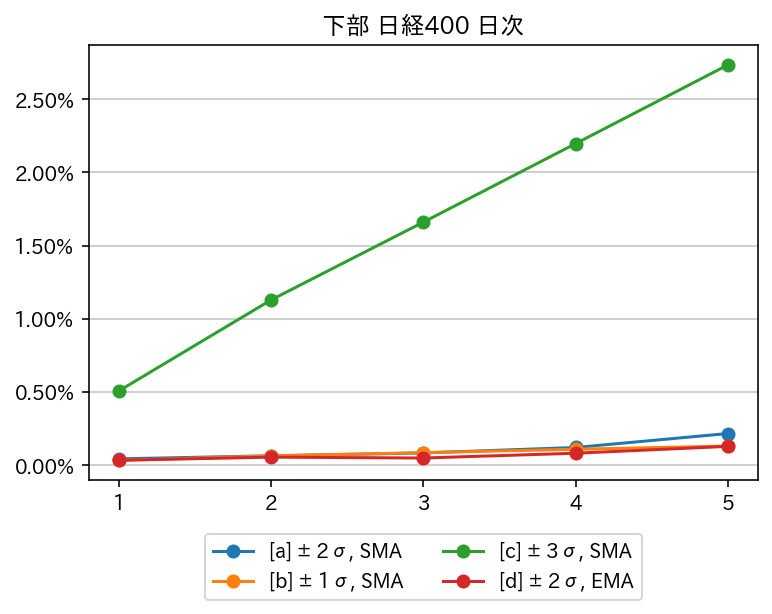

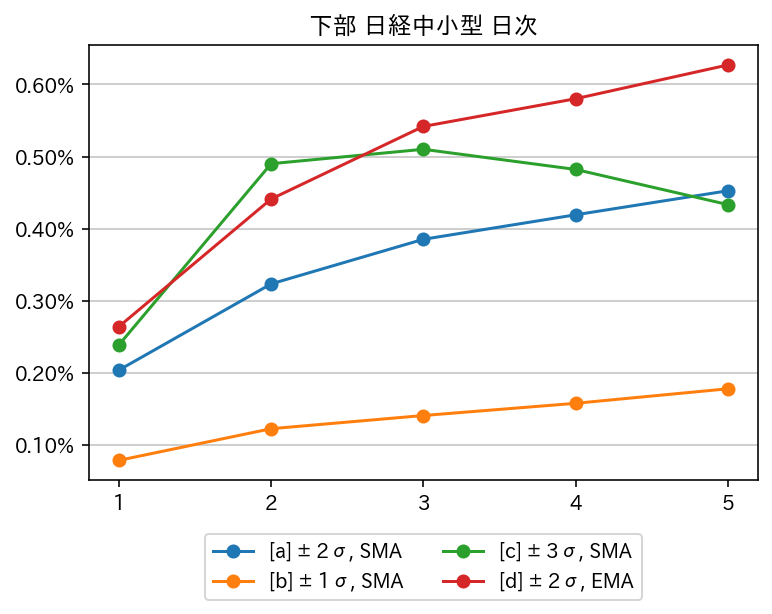

In [17]:
y1 = get_mean_and_test(nk400_d_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_d_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_d_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_d_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('下部 日経400 日次')
plt.show()

y1 = get_mean_and_test(nk200_d_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_d_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_d_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_d_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('下部 日経中小型 日次')
plt.show()

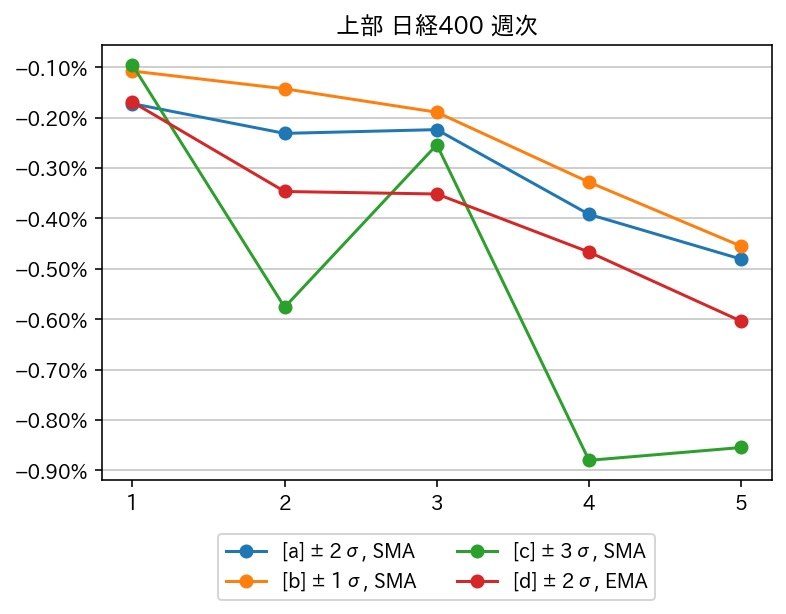

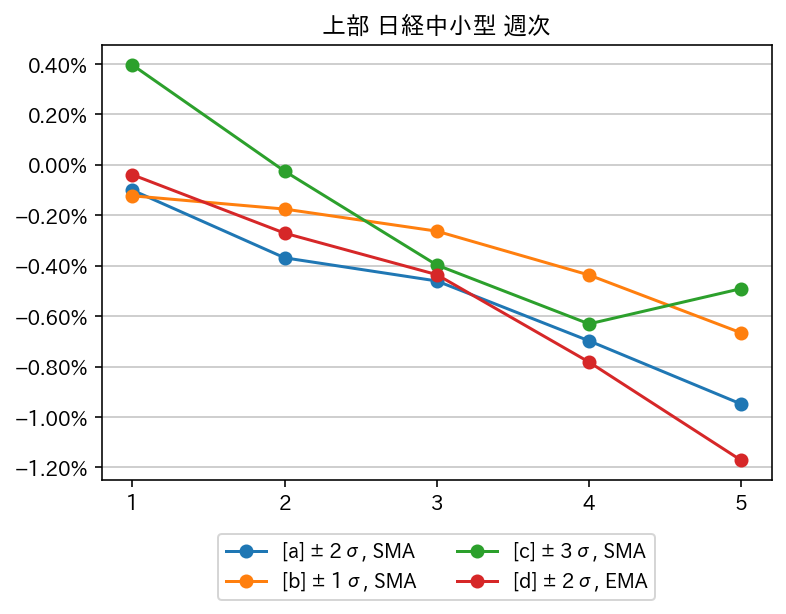

In [18]:
y1 = get_mean_and_test(nk400_w_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_w_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_w_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_w_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('上部 日経400 週次')
plt.show()

y1 = get_mean_and_test(nk200_w_upper_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_w_upper_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_w_upper_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_w_upper_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('上部 日経中小型 週次')
plt.show()

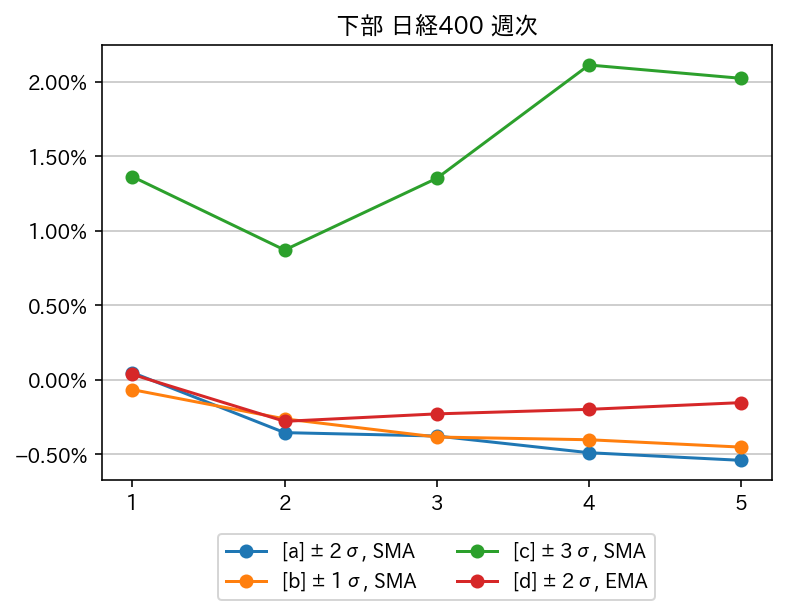

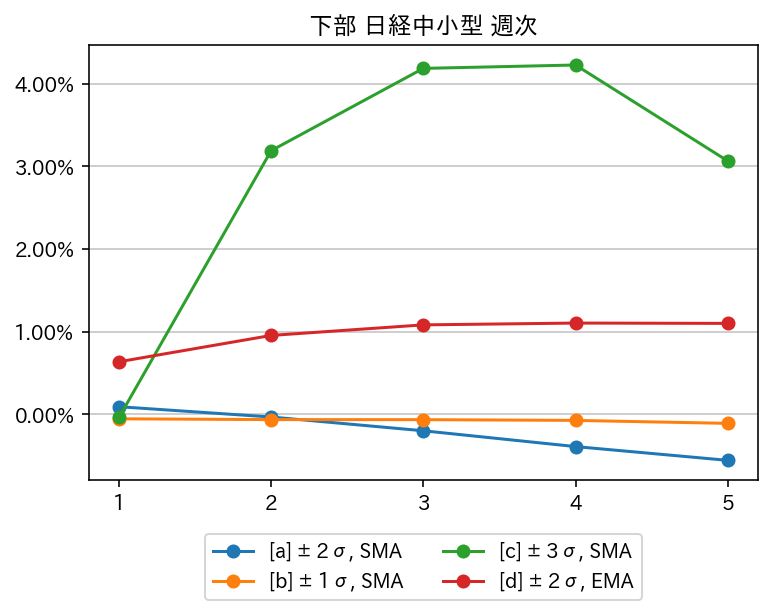

In [19]:
y1 = get_mean_and_test(nk400_w_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk400_w_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk400_w_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk400_w_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('下部 日経400 週次')
plt.show()

y1 = get_mean_and_test(nk200_w_lower_20_2_2_0)['CARs']
y2 = get_mean_and_test(nk200_w_lower_20_1_1_0)['CARs']
y3 = get_mean_and_test(nk200_w_lower_20_3_3_0)['CARs']
y4 = get_mean_and_test(nk200_w_lower_20_2_2_1)['CARs']
fig, ax = plt.subplots()
ax.set_xticks([1,2,3,4,5])
ax.yaxis.set_major_formatter(matplotlib.ticker.PercentFormatter(1.0, decimals=2))
ax.plot(y1, label="[a] ± 2σ, SMA", marker='o')
ax.plot(y2, label="[b] ± 1σ, SMA", marker='o')
ax.plot(y3, label="[c] ± 3σ, SMA", marker='o')
ax.plot(y4, label="[d] ± 2σ, EMA", marker='o')
ax.grid(which = "major", axis = "y", alpha = 0.6, linestyle = "-", linewidth = 1)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)
plt.title('下部 日経中小型 週次')
plt.show()